## Step 1: Importing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Churn-Data.csv")
# Let's see the head of our master dataset
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


## Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
df.shape

(5634, 21)

In [5]:
# let's look at the statistical aspects of the dataframe
df.describe()

,SeniorCitizen,tenure,Charges_Month
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [6]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


## Step 3: Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [7]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [8]:
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,0,1,21,1,No,DSL,Yes,...,Yes,No,No,Yes,One year,0,Mailed check,64.85,1336.8,0
1,6035-RIIOM,Female,0,0,0,54,1,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,1,Bank transfer (automatic),97.20,5129.45,0
2,3797-VTIDR,Male,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,23.45,23.45,1
3,2568-BRGYX,Male,0,0,0,4,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.20,237.95,1
4,2775-SEFEE,Male,0,0,1,0,1,Yes,DSL,Yes,...,No,Yes,No,No,Two year,1,Bank transfer (automatic),61.90,,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [9]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'Method_Payment', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [10]:
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,Method_Payment_Credit card (automatic),Method_Payment_Electronic check,Method_Payment_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,4223-BKEOR,Female,0,0,1,21,1,No,DSL,Yes,...,1336.8,0,True,False,False,False,True,False,False,False
1,6035-RIIOM,Female,0,0,0,54,1,Yes,Fiber optic,No,...,5129.45,0,False,True,False,False,False,False,True,False
2,3797-VTIDR,Male,0,1,0,1,0,No phone service,DSL,No,...,23.45,1,False,False,False,True,False,True,False,False
3,2568-BRGYX,Male,0,0,0,4,1,No,Fiber optic,No,...,237.95,1,False,False,False,True,False,True,True,False
4,2775-SEFEE,Male,0,0,1,0,1,Yes,DSL,Yes,...,,0,False,True,False,False,False,True,False,False


In [11]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['TV_Streaming'], prefix='TV_Streaming')
st1 = st.drop(['TV_Streaming_No internet service'], axis=1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['Movie_Streaming'], prefix='Movie_Streaming')
sm1 = sm.drop(['Movie_Streaming_No internet service'], axis=1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)

In [12]:
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,TV_Streaming_No,TV_Streaming_Yes,Movie_Streaming_No,Movie_Streaming_Yes
0,4223-BKEOR,Female,0,0,1,21,1,No,DSL,Yes,...,True,False,False,True,True,False,True,False,False,True
1,6035-RIIOM,Female,0,0,0,54,1,Yes,Fiber optic,No,...,False,True,True,False,True,False,False,True,False,True
2,3797-VTIDR,Male,0,1,0,1,0,No phone service,DSL,No,...,True,False,True,False,True,False,True,False,True,False
3,2568-BRGYX,Male,0,0,0,4,1,No,Fiber optic,No,...,True,False,True,False,True,False,True,False,True,False
4,2775-SEFEE,Male,0,0,1,0,1,Yes,DSL,Yes,...,False,True,True,False,False,True,True,False,True,False


### Dropping the repeated variables

In [13]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Contract','Method_Payment','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'TV_Streaming', 'Movie_Streaming'], axis=1)

In [14]:
#The varaible was imported as a string we need to convert it to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   cID                                     5634 non-null   object 
 1   SeniorCitizen                           5634 non-null   int64  
 2   Partner                                 5634 non-null   int64  
 3   Dependents                              5634 non-null   int64  
 4   tenure                                  5634 non-null   int64  
 5   PhoneService                            5634 non-null   int64  
 6   PaperlessBilling                        5634 non-null   int64  
 7   Charges_Month                           5634 non-null   float64
 8   TotalCharges                            5624 non-null   float64
 9   Churn                                   5634 non-null   int64  
 10  Contract_One year                       5634 non-null   bool

### Checking for Outliers

In [16]:
# Checking for outliers in the continuous variables
num_df = df[['tenure','Charges_Month','SeniorCitizen','TotalCharges']]

In [17]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,Charges_Month,SeniorCitizen,TotalCharges
count,5634.000000,5634.000000,5634.000000,5624.000000
mean,32.373092,64.864253,0.160809,2291.154605
std,24.424539,30.089324,0.367388,2263.151534
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.750000,0.000000,411.512500
50%,29.000000,70.525000,0.000000,1410.800000
75%,55.000000,89.937500,0.000000,3808.850000
90%,69.000000,102.600000,1.000000,5980.690000
95%,72.000000,107.017500,1.000000,6889.970000
99%,72.000000,114.733500,1.000000,8013.366000


### Checking for Missing Values and Inputing Them

In [18]:
# Adding up the missing values (column-wise)
df.isnull().sum()

cID                                        0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
Charges_Month                              0
TotalCharges                              10
Churn                                      0
Contract_One year                          0
Contract_Two year                          0
Method_Payment_Credit card (automatic)     0
Method_Payment_Electronic check            0
Method_Payment_Mailed check                0
gender_Male                                0
InternetService_Fiber optic                0
InternetService_No                         0
MultipleLines_No                           0
MultipleLines_Yes                          0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBack

It means that 10/5634 = 0.00177493787 i.e < 0.1%, best is to remove these observations from the analysis

In [19]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

cID                                       0.00
SeniorCitizen                             0.00
Partner                                   0.00
Dependents                                0.00
tenure                                    0.00
PhoneService                              0.00
PaperlessBilling                          0.00
Charges_Month                             0.00
TotalCharges                              0.18
Churn                                     0.00
Contract_One year                         0.00
Contract_Two year                         0.00
Method_Payment_Credit card (automatic)    0.00
Method_Payment_Electronic check           0.00
Method_Payment_Mailed check               0.00
gender_Male                               0.00
InternetService_Fiber optic               0.00
InternetService_No                        0.00
MultipleLines_No                          0.00
MultipleLines_Yes                         0.00
OnlineSecurity_No                         0.00
OnlineSecurit

In [20]:
# Removing NaN TotalCharges rows
df = df[~np.isnan(df['TotalCharges'])]

In [21]:
# Checking percentage of missing values after removing the missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

cID                                       0.0
SeniorCitizen                             0.0
Partner                                   0.0
Dependents                                0.0
tenure                                    0.0
PhoneService                              0.0
PaperlessBilling                          0.0
Charges_Month                             0.0
TotalCharges                              0.0
Churn                                     0.0
Contract_One year                         0.0
Contract_Two year                         0.0
Method_Payment_Credit card (automatic)    0.0
Method_Payment_Electronic check           0.0
Method_Payment_Mailed check               0.0
gender_Male                               0.0
InternetService_Fiber optic               0.0
InternetService_No                        0.0
MultipleLines_No                          0.0
MultipleLines_Yes                         0.0
OnlineSecurity_No                         0.0
OnlineSecurity_Yes                

## Step 4: Test-Train Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Putting feature variable to X
X = df.drop(['Churn','cID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Month,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,TV_Streaming_No,TV_Streaming_Yes,Movie_Streaming_No,Movie_Streaming_Yes
0,0,0,1,21,1,0,64.85,1336.80,True,False,...,True,False,False,True,True,False,True,False,False,True
1,0,0,0,54,1,1,97.20,5129.45,False,True,...,False,True,True,False,True,False,False,True,False,True
2,0,1,0,1,0,1,23.45,23.45,False,False,...,True,False,True,False,True,False,True,False,True,False
3,0,0,0,4,1,1,70.20,237.95,False,False,...,True,False,True,False,True,False,True,False,True,False
5,0,0,0,7,1,1,69.55,521.35,False,False,...,True,False,True,False,True,False,True,False,True,False


In [24]:
# Putting response variable to y
y = df['Churn']

y.head()

0    0
1    0
2    1
3    1
5    0
Name: Churn, dtype: int64

In [25]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

X_train[['tenure','Charges_Month','TotalCharges']] = scaler.fit_transform(X_train[['tenure','Charges_Month','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Month,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,TV_Streaming_No,TV_Streaming_Yes,Movie_Streaming_No,Movie_Streaming_Yes
4616,1,0,0,-0.499866,1,0,0.539879,-0.288448,False,False,...,True,False,True,False,True,False,False,True,True,False
4806,0,0,0,1.172704,1,1,1.800324,2.257880,True,False,...,False,True,False,True,False,True,False,True,False,True
381,0,0,0,-1.274960,1,0,0.666256,-0.965683,False,False,...,True,False,True,False,True,False,False,True,True,False
3378,1,1,0,-1.030193,1,1,1.156799,-0.708483,False,False,...,True,False,False,True,True,False,False,True,False,True
2277,1,0,0,1.621443,1,0,1.640690,2.470432,False,True,...,False,True,False,True,False,True,False,True,False,True


In [28]:
### Checking the Churn Rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.600284495021338

We have almost 27% churn rate

## Step 6: Looking at Correlations

In [29]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

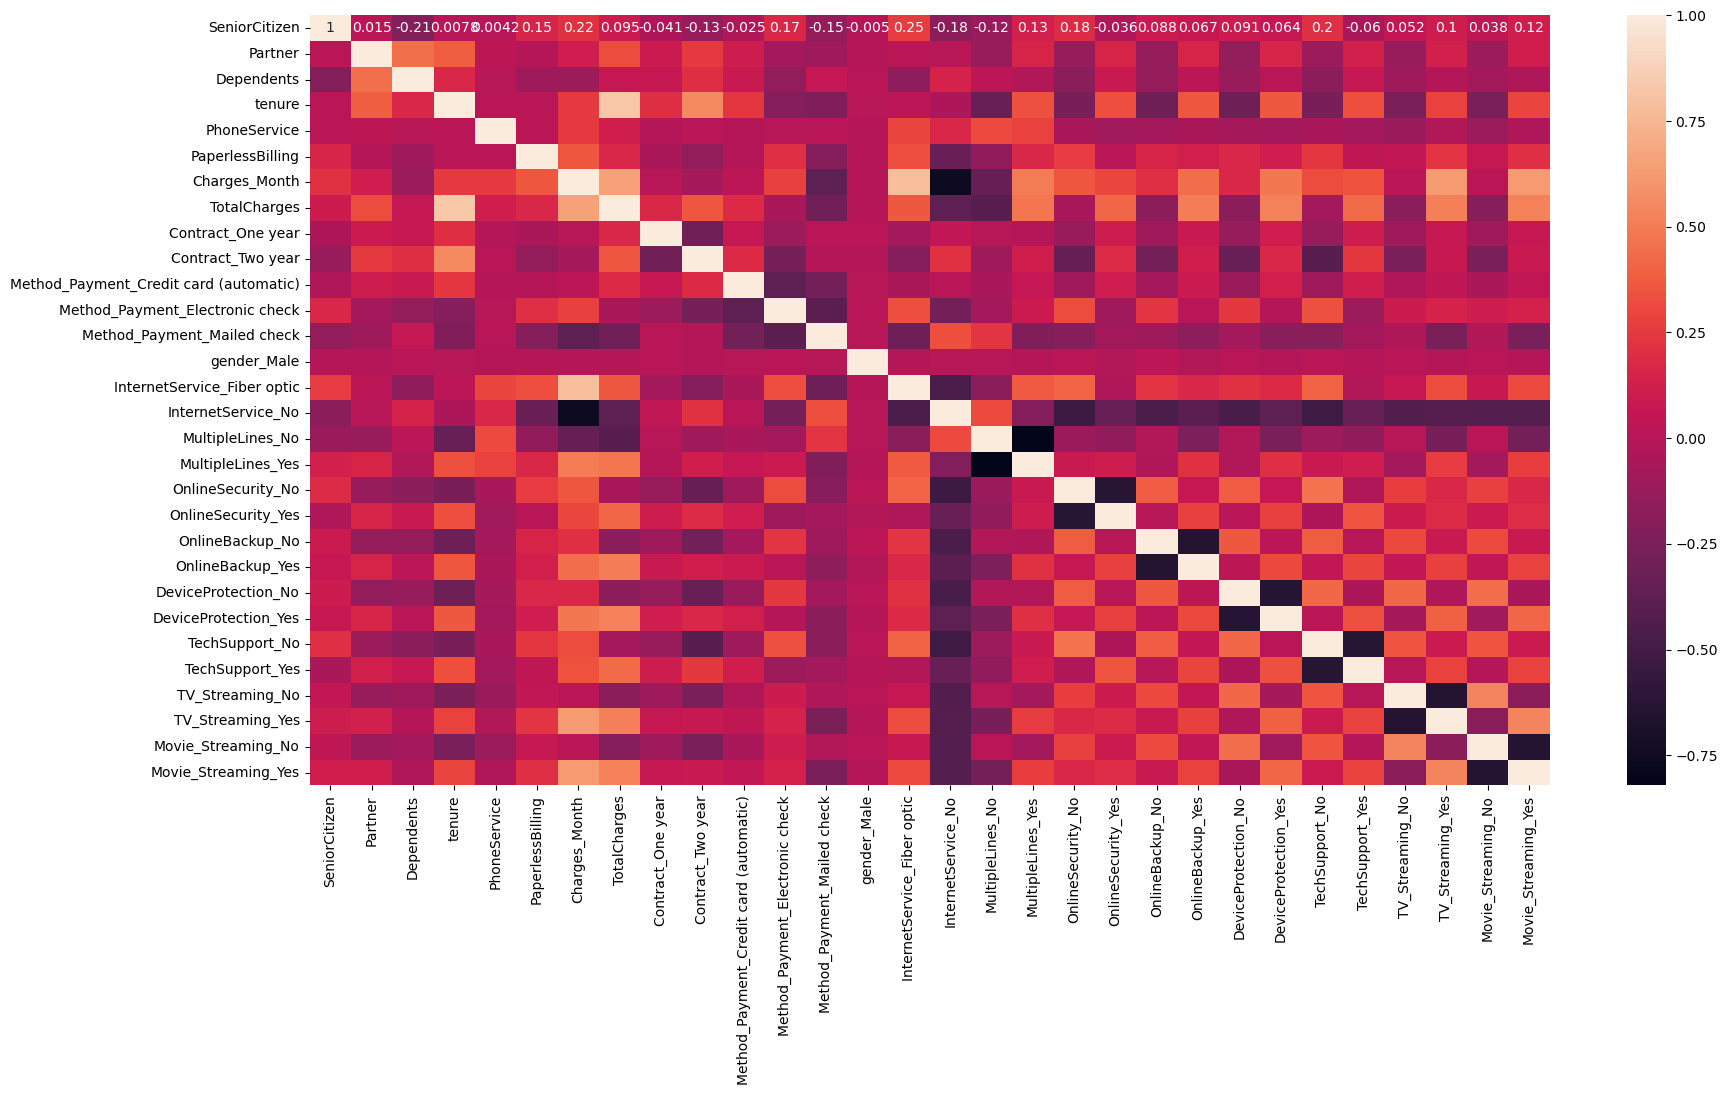

In [33]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables

In [36]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'TV_Streaming_No','Movie_Streaming_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'TV_Streaming_No','Movie_Streaming_No'], axis=1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

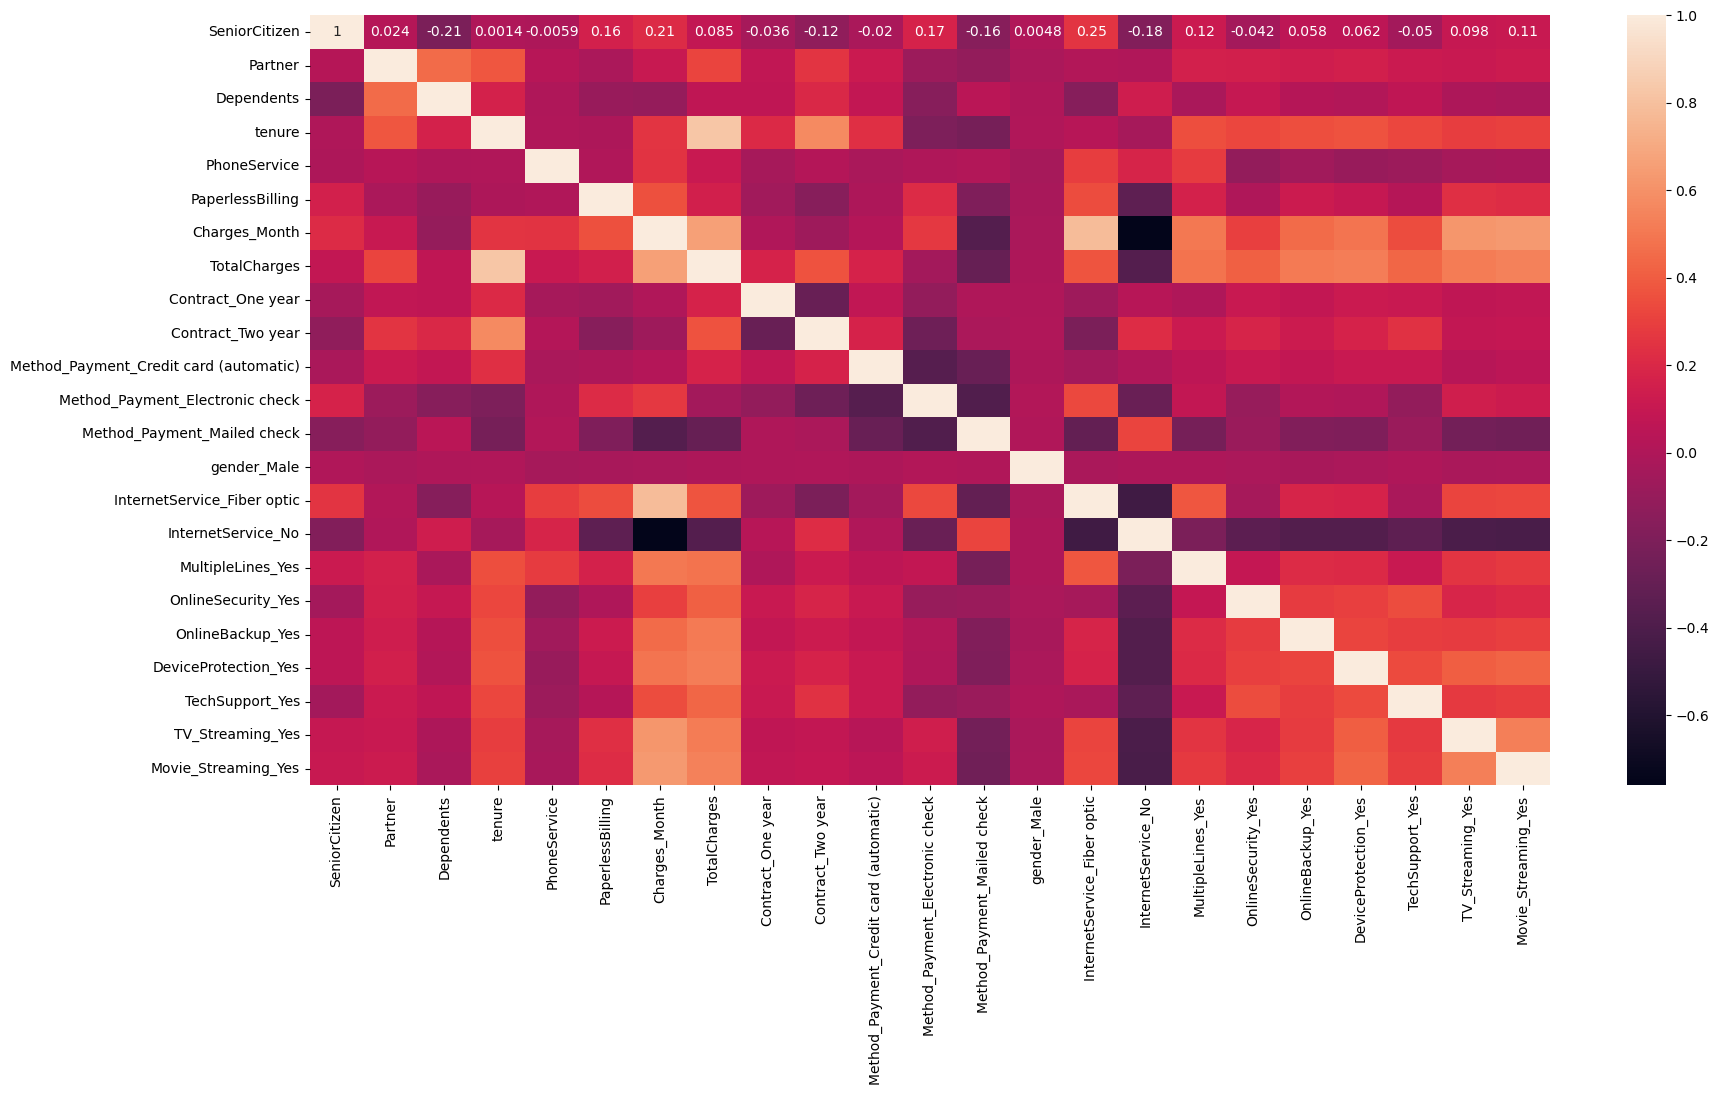

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [45]:
import statsmodels.api as sm

Before creating the model let's convert boolean values to numerical that is 0 or 1


In [46]:
def preprocess_data(df):
    # Fill missing values with the mean of each column
    df = df.fillna(df.mean())
    
    # Convert boolean values to numeric
    df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
    
    # Convert categorical variables to numeric using one-hot encoding
    df = pd.get_dummies(df, drop_first=True)
    
    # Ensure all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df

# Preprocess X_train and X_test
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [47]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3936
Model:                            GLM   Df Residuals:                     3912
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1659.1
Date:                Wed, 03 Jul 2024   Deviance:                       3318.2
Time:                        12:47:51   Pearson chi2:                 4.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2702
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.8446      1.694     -1.679      0.093      -6.165       0.476
SeniorCitizen                              0.2031      0.113      1.804      0.071      -0.018       0.424
Partner                                    0.0550      0.103      0.532      0.595      -0.148       0.257
Dependents                                -0.1631      0.120     -1.361      0.173      -0.398       0.072
tenure                                    -1.5193      0.202     -7.525      0.000      -1.915      -1.124
PhoneService                               0.2601      0.868      0.300      0.764      -1.440       1.961
PaperlessBilling                           0.3684      0.100      3.689      0.000       0.173       0.564
Charges_Month                             -1.4660      1.279     -1.146      0.252      -3.973       1.041
TotalCharges                               0.7953      0.211      3.764      0.000       0.381       1.209
Contract_One year                         -0.5883      0.139     -4.230      0.000      -0.861      -0.316
Contract_Two year                         -1.4055      0.239     -5.871      0.000      -1.875      -0.936
Method_Payment_Credit card (automatic)    -0.1382      0.148     -0.936      0.349      -0.428       0.151
Method_Payment_Electronic check            0.2926      0.121      2.416      0.016       0.055       0.530
Method_Payment_Mailed check               -0.1540      0.148     -1.040      0.298      -0.444       0.136
gender_Male                               -0.0822      0.086     -0.958      0.338      -0.250       0.086
InternetService_Fiber optic                1.9105      1.069      1.788      0.074      -0.184       4.005
InternetService_No                        -1.9349      1.079     -1.793      0.073      -4.050       0.180
MultipleLines_Yes                          0.3623      0.240      1.512      0.130      -0.107       0.832
OnlineSecurity_Yes                        -0.1666      0.238     -0.700      0.484      -0.633       0.300
OnlineBackup_Yes                           0.1188      0.236      0.503      0.615      -0.344       0.582
DeviceProtection_Yes                       0.2368      0.236      1.006      0.315      -0.225       0.698
TechSupport_Yes                           -0.1393      0.242     -0.574      0.566      -0.615       0.336
TV_Streaming_Yes                           0.7218      0.438      1.648      0.099      -0.137       1.580
Movie_Streaming_Yes                        0.6555      0.436      1.503      0.133      -0.199       1.510
==========================================================================================================
"""

## Step 8: Feature Selection Using RFE

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [50]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [51]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True])

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', True, 1),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('Charges_Month', False, 8),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('Method_Payment_Credit card (automatic)', False, 3),
 ('Method_Payment_Electronic check', True, 1),
 ('Method_Payment_Mailed check', False, 2),
 ('gender_Male', False, 6),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 4),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('TV_Streaming_Yes', True, 1),
 ('Movie_Streaming_Yes', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]

In [54]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Charges_Month', 'Method_Payment_Credit card (automatic)',
       'Method_Payment_Mailed check', 'gender_Male', 'MultipleLines_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

#### Assessing the model with StatsModels

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3936
Model:                            GLM   Df Residuals:                     3920
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1662.5
Date:                Wed, 03 Jul 2024   Deviance:                       3324.9
Time:                        12:51:13   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2689
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.1063      0.187     -5.915      0.000      -1.473      -0.740
SeniorCitizen                       0.2182      0.111      1.959      0.050      -0.000       0.436
Dependents                         -0.1358      0.108     -1.253      0.210      -0.348       0.077
tenure                             -1.4725      0.197     -7.475      0.000      -1.859      -1.086
PhoneService                       -0.6637      0.172     -3.865      0.000      -1.000      -0.327
PaperlessBilling                    0.3712      0.099      3.732      0.000       0.176       0.566
TotalCharges                        0.7605      0.203      3.751      0.000       0.363       1.158
Contract_One year                  -0.6005      0.138     -4.345      0.000      -0.871      -0.330
Contract_Two year                  -1.4096      0.239     -5.908      0.000      -1.877      -0.942
Method_Payment_Electronic check     0.3861      0.091      4.236      0.000       0.207       0.565
InternetService_Fiber optic         0.7376      0.129      5.734      0.000       0.485       0.990
InternetService_No                 -0.7125      0.178     -4.014      0.000      -1.060      -0.365
OnlineSecurity_Yes                 -0.4090      0.111     -3.696      0.000      -0.626      -0.192
TechSupport_Yes                    -0.3899      0.115     -3.403      0.001      -0.614      -0.165
TV_Streaming_Yes                    0.2460      0.107      2.296      0.022       0.036       0.456
Movie_Streaming_Yes                 0.1815      0.108      1.686      0.092      -0.029       0.393
===================================================================================================
"""

In [56]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4616    0.487114
4806    0.221519
381     0.677591
3378    0.793927
2277    0.042931
836     0.168491
2972    0.725471
701     0.007317
2522    0.552354
2909    0.349890
dtype: float64

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [57]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['cID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,cID
4616,0,0.487114,4616
4806,0,0.221519,4806
381,1,0.677591,381
3378,1,0.793927,3378
2277,0,0.042931,2277


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,cID,predicted
4616,0,0.487114,4616,0
4806,0,0.221519,4806,0
381,1,0.677591,381,1
3378,1,0.793927,3378,1
2277,0,0.042931,2277,0


In [59]:
from sklearn import metrics

In [60]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[2601  289]
 [ 490  556]]


In [61]:
# Predicted     not_churn    churn
# Actual
# not_churn        2601      289
# churn            490       556  

In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8020833333333334


### Checking VIFs

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PhoneService,7.82
5,TotalCharges,7.61
2,tenure,6.69
9,InternetService_Fiber optic,4.04
7,Contract_Two year,3.32
10,InternetService_No,3.26
4,PaperlessBilling,2.76
14,Movie_Streaming_Yes,2.70
13,TV_Streaming_Yes,2.64
12,TechSupport_Yes,2.03


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [65]:
col = col.drop('PhoneService', 1)
col

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PaperlessBilling',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'Method_Payment_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'TV_Streaming_Yes', 'Movie_Streaming_Yes'],
      dtype='object')

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3936
Model:                            GLM   Df Residuals:                     3921
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1669.9
Date:                Wed, 03 Jul 2024   Deviance:                       3339.8
Time:                        12:55:49   Pearson chi2:                 4.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2661
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.5843      0.142    -11.158      0.000      -1.863      -1.306
SeniorCitizen                       0.2394      0.111      2.152      0.031       0.021       0.457
Dependents                         -0.1426      0.108     -1.320      0.187      -0.354       0.069
tenure                             -1.2813      0.190     -6.754      0.000      -1.653      -0.910
PaperlessBilling                    0.3725      0.099      3.760      0.000       0.178       0.567
TotalCharges                        0.5619      0.196      2.867      0.004       0.178       0.946
Contract_One year                  -0.5986      0.138     -4.339      0.000      -0.869      -0.328
Contract_Two year                  -1.4042      0.238     -5.903      0.000      -1.870      -0.938
Method_Payment_Electronic check     0.4050      0.091      4.459      0.000       0.227       0.583
InternetService_Fiber optic         0.5679      0.119      4.767      0.000       0.334       0.801
InternetService_No                 -0.9057      0.169     -5.362      0.000      -1.237      -0.575
OnlineSecurity_Yes                 -0.4045      0.110     -3.661      0.000      -0.621      -0.188
TechSupport_Yes                    -0.4054      0.114     -3.546      0.000      -0.629      -0.181
TV_Streaming_Yes                    0.2736      0.107      2.560      0.010       0.064       0.483
Movie_Streaming_Yes                 0.2245      0.107      2.100      0.036       0.015       0.434
===================================================================================================
"""

In [67]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [68]:
y_train_pred[:10]

array([0.49375178, 0.20048836, 0.6798876 , 0.80541489, 0.03983016,
       0.16579985, 0.72778845, 0.00965526, 0.55955101, 0.35052028])

In [69]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [70]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,cID,predicted
4616,0,0.493752,4616,0
4806,0,0.200488,4806,0
381,1,0.679888,381,1
3378,1,0.805415,3378,1
2277,0,0.039830,2277,0


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7982723577235772


So overall the accuracy hasn't dropped much.

#### Let's check the VIFs again

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,TotalCharges,7.60
2,tenure,6.54
6,Contract_Two year,3.17
8,InternetService_Fiber optic,2.94
13,Movie_Streaming_Yes,2.69
12,TV_Streaming_Yes,2.63
3,PaperlessBilling,2.60
9,InternetService_No,2.31
11,TechSupport_Yes,1.93
5,Contract_One year,1.87


In [73]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PaperlessBilling',
       'Contract_One year', 'Contract_Two year',
       'Method_Payment_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'TV_Streaming_Yes', 'Movie_Streaming_Yes'],
      dtype='object')

In [74]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3936
Model:                            GLM   Df Residuals:                     3922
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1674.2
Date:                Wed, 03 Jul 2024   Deviance:                       3348.4
Time:                        12:57:57   Pearson chi2:                 4.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2645
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6510      0.139    -11.845      0.000      -1.924      -1.378
SeniorCitizen                       0.2349      0.112      2.104      0.035       0.016       0.454
Dependents                         -0.1494      0.108     -1.383      0.167      -0.361       0.062
tenure                             -0.7844      0.069    -11.376      0.000      -0.920      -0.649
PaperlessBilling                    0.3656      0.099      3.698      0.000       0.172       0.559
Contract_One year                  -0.5978      0.137     -4.361      0.000      -0.866      -0.329
Contract_Two year                  -1.3793      0.236     -5.847      0.000      -1.842      -0.917
Method_Payment_Electronic check     0.3974      0.091      4.365      0.000       0.219       0.576
InternetService_Fiber optic         0.7393      0.103      7.177      0.000       0.537       0.941
InternetService_No                 -0.9123      0.168     -5.420      0.000      -1.242      -0.582
OnlineSecurity_Yes                 -0.3709      0.110     -3.372      0.001      -0.587      -0.155
TechSupport_Yes                    -0.3565      0.113     -3.147      0.002      -0.579      -0.134
TV_Streaming_Yes                    0.3390      0.104      3.249      0.001       0.134       0.543
Movie_Streaming_Yes                 0.2920      0.104      2.801      0.005       0.088       0.496
===================================================================================================
"""

In [75]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [76]:
y_train_pred[:10]

array([0.51357426, 0.14643772, 0.69525019, 0.82131373, 0.03154089,
       0.17273528, 0.72916069, 0.01167618, 0.56325003, 0.360698  ])

In [77]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [78]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,cID,predicted
4616,0,0.513574,4616,1
4806,0,0.146438,4806,0
381,1,0.695250,381,1
3378,1,0.821314,3378,1
2277,0,0.031541,2277,0


In [79]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7992886178861789


The accuracy is still practically the same.

#### Let's now check the VIFs again

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Contract_Two year,3.07
12,Movie_Streaming_Yes,2.58
3,PaperlessBilling,2.53
11,TV_Streaming_Yes,2.53
7,InternetService_Fiber optic,2.45
8,InternetService_No,1.97
10,TechSupport_Yes,1.90
4,Contract_One year,1.85
2,tenure,1.84
6,Method_Payment_Electronic check,1.77


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [81]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[2602,  288],
       [ 502,  544]], dtype=int64)

In [82]:
# Actual/Predicted     not_churn    churn
        # not_churn        2602      288
        # churn            502       544 

In [83]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7992886178861789

# Metrics beyond simply accuracy

In [84]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5200764818355641

In [86]:
# Let us calculate specificity
TN / float(TN+FP)

0.9003460207612457

In [87]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09965397923875433


In [88]:
# positive predictive value 
print (TP / float(TP+FP))

0.6538461538461539


In [89]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8382731958762887


## Precision and Recall

In [90]:
#Looking at the confusion matrix again

In [91]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[2602,  288],
       [ 502,  544]], dtype=int64)

#### Precision
TP / TP + FP

In [92]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5200764818355641

Using sklearn utilities for the same

In [93]:
from sklearn.metrics import precision_score, recall_score

In [94]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6538461538461539

## Precision and recall tradeoff

In [95]:
from sklearn.metrics import precision_recall_curve

In [96]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(4616    0
 4806    0
 381     1
 3378    1
 2277    0
        ..
 4155    0
 1892    0
 352     1
 80      0
 3932    1
 Name: Churn, Length: 3936, dtype: int64,
 4616    1
 4806    0
 381     1
 3378    1
 2277    0
        ..
 4155    0
 1892    0
 352     0
 80      0
 3932    1
 Name: predicted, Length: 3936, dtype: int64)

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

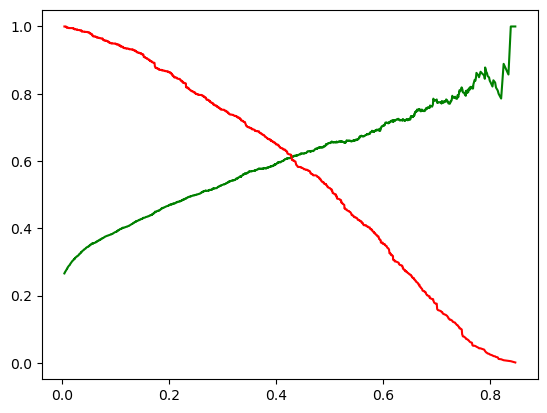

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [99]:
X_test[['tenure','Charges_Month','TotalCharges']] = scaler.transform(X_test[['tenure','Charges_Month','TotalCharges']])

In [100]:
X_test = X_test[col]
X_test.head()

,SeniorCitizen,Dependents,tenure,PaperlessBilling,Contract_One year,Contract_Two year,Method_Payment_Electronic check,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,TV_Streaming_Yes,Movie_Streaming_Yes
2289,0,1,-0.744633,0,1,0,0,0,1,0,0,0,0
4486,0,1,0.275227,1,1,0,1,1,0,0,1,0,0
943,0,0,-0.989399,1,0,0,0,0,0,0,0,0,0
1879,1,0,-0.785427,1,0,0,1,1,0,0,0,1,1
2819,1,0,0.805555,1,0,0,1,1,0,0,1,1,1


In [101]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
y_test_pred[:10]

2289    0.061438
4486    0.187216
943     0.375381
1879    0.791381
2819    0.432612
5280    0.021294
1726    0.704834
3518    0.594973
1483    0.038083
1208    0.148652
dtype: float64

In [104]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [105]:
# Let's see the head
y_pred_1.head()

,0
2289,0.061438
4486,0.187216
943,0.375381
1879,0.791381
2819,0.432612


In [106]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [107]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [108]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
y_pred_final.head()

,Churn,CustID,0
0,0,2289,0.061438
1,1,4486,0.187216
2,0,943,0.375381
3,0,1879,0.791381
4,0,2819,0.432612


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [114]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID', 'Churn', 'Churn_Prob'], axis=1)

In [115]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,2289,0,0.061438
1,4486,1,0.187216
2,943,0,0.375381
3,1879,0,0.791381
4,2819,0,0.432612


In [116]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [117]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,2289,0,0.061438,0
1,4486,1,0.187216,0
2,943,0,0.375381,0
3,1879,0,0.791381,1
4,2819,0,0.432612,1


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.792654028436019

In [119]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1048,  190],
       [ 160,  290]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6444444444444445

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.8465266558966075